In [5]:
%matplotlib

Using matplotlib backend: MacOSX


In [6]:

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline
sns.set_palette('colorblind')
sns.set_style('white')

In [171]:
import pandas as pd
import nltk
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [61]:
df = pd.read_csv('newtrain.csv')
df.head()

,Category,Text
0,5,why are yawns contagious? when people yawn
1,6,what is trans fat? how to reduce that? i heard...
2,1,roth ira vs 401k? what is the difference betwe...
3,1,how many planes fedex has? i heard that it is ...
4,2,what is the best photo slideshow creation appl...


In [62]:
#tokenize text
pattern = r'''(?x)    # set flag to allow verbose regexps
     ([A-Z]\.)+        # abbreviations, e.g. U.S.A.
   | \w+([-']\w+)*        # words with optional internal hyphens
   | \$?\d+(\.\d+)?%?  # currency and percentages, e.g. $12.40, 82%
   | \.\.\.            # ellipsis
   | [.,;"?():-_`]+  # these are separate tokens
 '''

tokenize = lambda text: nltk.regexp_tokenize(text, pattern)
df['Text'] = df['Text'].apply(tokenize)

In [63]:
df.head()

,Category,Text
0,5,"[why, are, yawns, contagious, ?, when, people,..."
1,6,"[what, is, trans, fat, ?, how, to, reduce, tha..."
2,1,"[roth, ira, vs, 401k, ?, what, is, the, differ..."
3,1,"[how, many, planes, fedex, has, ?, i, heard, t..."
4,2,"[what, is, the, best, photo, slideshow, creati..."


In [64]:
#remove punctuation, stopwords
#rem_chars = [p for p in string.punctuation] + list(ENGLISH_STOP_WORDS)
rem_chars = [p for p in string.punctuation]
rem = lambda a: ' '.join([i for i in a if i not in rem_chars])
#rem = lambda a: [i for i in a if i not in rem_chars]
df['Text'] = df['Text'].apply(rem)


In [65]:
df.head()

,Category,Text
0,5,why are yawns contagious when people yawn
1,6,what is trans fat how to reduce that i heard t...
2,1,roth ira vs 401k what is the difference betwee...
3,1,how many planes fedex has i heard that it is t...
4,2,what is the best photo slideshow creation appl...


In [80]:
# Remove html and punctuation
#rem_chars = ['http', 'www', 'com', 'html'] + [p for p in string.punctuation]
#rem = lambda a: [i for i in a if i not in rem_chars]
#df['Text'] = df['Text'].apply(rem)


In [99]:
df.Text.iloc[7]

'is lin qingxia aka brigitte lin the most beautiful woman in chinese cinema this is according to stephen chow http www hkentreview com 2005 features kfh kfhprem html ). is it true who is the best-looking male star did they make any movies together'

In [174]:
vec.stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [190]:
#vectorize data
#turns words into a list of vectors - vector length is the total number of words
#Vector elements correspond to 1 word (1/0 if word is/not present in the current item)

#targets
vec_tar = LabelEncoder()
targets = vec_tar.fit_transform(df['Category'])

#counts
vec = CountVectorizer(stop_words=ENGLISH_STOP_WORDS, max_features = 1000)
counts = vec.fit_transform(df['Text']) 


#linear SVC
mod = LinearSVC(C=.1)
cv = StratifiedShuffleSplit(targets, n_iter=10, test_size=.1)

scores = []
for tr, tt in cv:
    mod.fit(counts[tr], targets[tr])
    scores.append(mod.score(counts[tt],targets[tt]))
print('\nLinear SVC\n\tmean score: {0}'.format(np.mean(scores)))


#naive bayes
mod = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
cv = StratifiedShuffleSplit(targets, n_iter = 10, test_size = 0.1)

scores = []
for tr, tt in cv:
    mod.fit(counts[tr], targets[tr])
    scores.append(mod.score(counts[tt],targets[tt]))
print('\nNaive Bayes\n\t mean score: {0}'.format(np.mean(scores)))

'''
#decision tree
mod = DecisionTreeClassifier(criterion = 'entropy')
cv = StratifiedShuffleSplit(targets, n_iter = 10, test_size = 0.1)

scores = []
for tr, tt in cv:
    mod.fit(counts[tr], targets[tr])
    scores.append(mod.score(counts[tt],targets[tt]))
print('\nDecision Tree\n\t mean score: {0}'.format(np.mean(scores)))
'''


Linear SVC
	mean score: 0.548888888888889

Naive Bayes
	 mean score: 0.5448148148148149


"\n#decision tree\nmod = DecisionTreeClassifier(criterion = 'entropy')\ncv = StratifiedShuffleSplit(targets, n_iter = 10, test_size = 0.1)\n\nscores = []\nfor tr, tt in cv:\n    mod.fit(counts[tr], targets[tr])\n    scores.append(mod.score(counts[tt],targets[tt]))\nprint('\nDecision Tree\n\t mean score: {0}'.format(np.mean(scores)))\n"

In [160]:
mxdf

0.10000000000000001

In [151]:
counts = vec.fit_transform(df['Text']) 
counts.shape

(2698, 1000)

In [152]:
targets = vec_tar.fit_transform(df['Category'])
targets.shape

(2698,)

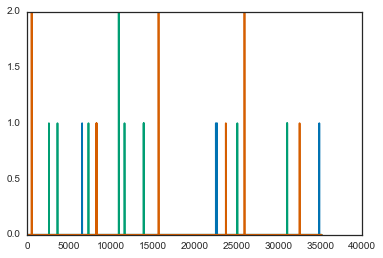

In [92]:
#each color is a question, x axis is the words, y axis is the counts (like histogram)
plt.plot(counts[:3,:].toarray().T)

In [119]:
top_words = {}
for itrg in np.unique(targets):
    cat = vec_tar.classes_[itrg]
    # Pull rows for the current category, sum all rows (each element is a word)
    icounts = counts[targets == itrg, :].sum(0).squeeze() 
    
    # Which word counts occured >5 times
    mask_top_words = icounts > 5
    
    # Turns vectors back into actual words (inverse transform - magical!)
    top_words[cat] = vec.inverse_transform(mask_top_words)[0]

In [19]:
#keep words that are unique to that category
unique_words = {}
for cat, words in zip(top_words.keys(), top_words.values()):
    others = top_words.copy()
    others.pop(cat)
    unique_words[cat] = [wrd for wrd in top_words[cat]
                         if wrd not in np.hstack(others.values())]

In [153]:
#try SVC
mod = LinearSVC(C=.1)
cv = StratifiedShuffleSplit(targets, n_iter=10, test_size=.1)

coefs, scores = [[] for i in range(2)]
for tr, tt in cv:
    mod.fit(counts[tr], targets[tr])
    coefs.append(mod.coef_)
    print(mod.score(counts[tt], targets[tt]))
    scores.append(mod.score(counts[tt],targets[tt]))
coefs = np.array(coefs).mean(0)

print('Linear SVC mean score: {0}'.format(np.mean(scores)))

0.511111111111
0.566666666667
0.537037037037
0.503703703704
0.503703703704
0.537037037037
0.525925925926
0.511111111111
0.544444444444
0.522222222222
Linear SVC mean score: 0.5262962962962963


In [154]:
#try Naive Bayes
mod = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
cv = StratifiedShuffleSplit(targets, n_iter = 10, test_size = 0.1)

coefs = []
for tr, tt in cv:
    mod.fit(counts[tr], targets[tr])
    coefs.append(mod.coef_)
    print(mod.score(counts[tt], targets[tt]))
    scores.append(mod.score(counts[tt],targets[tt]))
coefs = np.array(coefs).mean(0)

print('Naive Bayes mean score: {0}'.format(np.mean(scores)))

0.52962962963
0.57037037037
0.518518518519
0.548148148148
0.577777777778
0.562962962963
0.57037037037
0.566666666667
0.588888888889
0.581481481481
Naive Bayes mean score: 0.5438888888888889


In [146]:
#look only at highly weighted
for cat, icoef in zip(vec_tar.classes_, coefs):
    cut = np.percentile(icoef, 99)
    important = icoef > cut
    print('{0}: {1}'.format(cat, vec.inverse_transform(important)))

1: [array(['best', 'does', 'good', 'know', 'like', 'make', 'need', 'people',
       'want', 'yahoo'], 
      dtype='<U13')]
2: [array(['best', 'computer', 'does', 'know', 'use', 'want', 'web', 'windows',
       'xa', 'yahoo'], 
      dtype='<U13')]
3: [array(['best', 'did', 'does', 'favorite', 'know', 'like', 'movie', 'music',
       'song', 'xa'], 
      dtype='<U13')]
4: [array(['boyfriend', 'does', 'friend', 'girl', 'guy', 'know', 'like',
       'love', 'really', 'want'], 
      dtype='<U13')]
5: [array(['best', 'college', 'does', 'good', 'help', 'know', 'need', 'school',
       'word', 'xa'], 
      dtype='<U13')]
6: [array(['bad', 'best', 'does', 'feel', 'good', 'help', 'know', 'like',
       'pain', 'way'], 
      dtype='<U13')]
7: [array(['does', 'earth', 'gas', 'life', 'make', 'really', 'tell', 'theory',
       'world', 'xa'], 
      dtype='<U13')]
